# Zonally integrated northward Ekman transport

This notebook is converted from plt_eulerian_wind.py, which visualizes zonally integrated northward Ekman transport.

## Last updated 9 October 2017.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
# wind, coriolis parameter
wdx1 = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v33/forcing.nc','r')
wdx2 = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v38/forcing.nc','r')
wdx3 = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v39/forcing.nc','r')
cori = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v45/output000/ocean_geometry.nc','r')
data  = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v45/output031/prog.nc','r')

In [3]:
# horizontal resolution in km
dx = 10.
# zonal distance of the domain in m (4000km)
X = 4.0e+6

In [4]:
# to confirm - reference density
rho_0 = 1010.3

In [5]:
tau1 = wdx1.variables['taux'][:,:]
tau2 = wdx2.variables['taux'][:,:]
tau3 = wdx3.variables['taux'][:,:]
f = cori.variables['f'][:,:]
yh = data.variables['yh'][:]   
ny = np.size(yh)

In [6]:
# Ekman transport
vh_m1 = np.full((ny),np.nan)
vh_m2 = np.full((ny),np.nan)
vh_m3 = np.full((ny),np.nan)

In [7]:
for j in xrange(0,ny):
    vh_m1[j] = -tau1[j,0]/rho_0/f[j,0]*X/1.e+6
    vh_m2[j] = -tau2[j,0]/rho_0/f[j,0]*X/1.e+6
    vh_m3[j] = -tau3[j,0]/rho_0/f[j,0]*X/1.e+6

In [8]:
%matplotlib inline

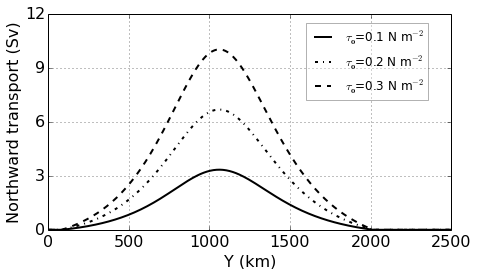

In [9]:
plt.figure(1,figsize=(8,5))
plt.plot(yh,vh_m1,linewidth=2.0,linestyle='-',color='k',label=r'$\mathbf{\tau_{o}}$=0.1 N m$^{-2}$')
plt.plot(yh,vh_m2,linewidth=2.0,linestyle='-.',color='k',label=r'$\mathbf{\tau_{o}}$=0.2 N m$^{-2}$')
plt.plot(yh,vh_m3,linewidth=2.0,linestyle='--',color='k',label=r'$\mathbf{\tau_{o}}$=0.3 N m$^{-2}$')
plt.gca().set_xlim([-1250.0,1250.0])
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_ylim([0,12.0])
plt.gca().set_yticks(np.arange(0,12.0 + 3.0,3.0))
plt.gca().set_yticklabels(['0','3','6','9','12'])
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Northward transport (Sv)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.gca().set_position([0.15,0.2,0.7,0.6])
plt.legend(loc=[0.64,0.6],framealpha=0.3)

#plt.savefig('/short/v45/lxy581/mom6/diag/Ekman_winds.png',dpi=600)

plt.show()